In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [2]:
df = pd.read_csv('DX.csv')
df.shape

(27131, 18)

In [3]:
df.columns

Index(['Transaction Name', 'Transaction Name URL', 'Organization Name',
       'Organization Name URL', 'Funding Type', 'Money Raised',
       'Money Raised Currency', 'Money Raised Currency (in USD)',
       'Announced Date', 'Total Funding Amount',
       'Total Funding Amount Currency',
       'Total Funding Amount Currency (in USD)', 'Organization Description',
       'Organization Industries', 'Organization Location', 'Lead Investors',
       'Number of Investors', 'Investor Names'],
      dtype='object')

In [4]:
def clean(i):
    i = i.copy()
    i.drop_duplicates(subset=['Organization Name','Funding Type'], inplace = True)
    i.drop_duplicates(keep='first', inplace= True)
    i['Raised Series A'] = np.where(i['Organization Name'].duplicated(), 1, 0)
    i.drop_duplicates(subset='Organization Name', keep='last', inplace= True)
    i['Money Raised Currency (in USD)'] = pd.to_numeric(i['Money Raised Currency (in USD)'],                   errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)']    ,errors='coerce')
    i['Announced Date'] = pd.to_datetime(i['Announced Date'], errors='coerce')
    i['Total Funding Amount Currency (in USD)'] = pd.to_numeric(i['Total Funding Amount Currency (in USD)']    ,errors='coerce')
    i  = i[i['Funding Type'] != 'Series A'] 

    # Dropping old Name columns 
    i.drop(columns =["Lead Investors"], inplace = True)
    i.drop(columns =["Number of Investors"], inplace = True)
    i.drop(columns =["Transaction Name"], inplace = True)
    i.drop(columns =["Transaction Name URL"], inplace = True)
    #i.drop(columns =["Organization Name URL"], inplace = True)
    i.drop(columns =["Funding Type"], inplace = True)
    i.drop(columns =["Money Raised Currency"], inplace = True)
    i.drop(columns =["Total Funding Amount Currency"], inplace = True)
    i.drop(columns =["Total Funding Amount"], inplace = True)
    i.drop(columns =["Money Raised"], inplace = True)
    i.drop(columns =["Total Funding Amount Currency (in USD)"], inplace = True)
    i.drop(columns =['Announced Date'], inplace = True) 
    i = i[i['Money Raised Currency (in USD)'].notna()]
    i = i[i['Organization Location'].notna()]
    i = i[i['Investor Names'].notna()]
    i = i[i['Organization Industries'].notna()]
    

    i["Organization Name"] = i["Organization Name"].astype('category')
    i["Organization Description"] = i["Organization Description"].astype('category')
    i["Organization Location"] = i["Organization Location"].astype('category')
    i['Investor Names'] = i['Investor Names'].astype('category')
    i['Organization Industries'] = i['Organization Industries'].astype('category')
    
   

    return i    


In [5]:
X = clean(df)

In [6]:
X.sample(5)

,Organization Name,Organization Name URL,Money Raised Currency (in USD),Organization Description,Organization Industries,Organization Location,Investor Names,Raised Series A
17678,Wthn,https://www.crunchbase.com/organization/wthn,2500000.0,Wthn is a natural wellness brand offering herb...,"Health Care, Wellness","New York, New York, United States, North America","BAM Ventures, David Bell, Rainfall Ventures, R...",0
18726,Mojro Technologies,https://www.crunchbase.com/organization/mojro-...,650000.0,Mojro envisions to be the world's largest tech...,"Information Technology, Logistics, Supply Chai...","Bengaluru, Karnataka, India, Asia",1Crowd,0
7886,MaiCapital / MaiBlocks,https://www.crunchbase.com/organization/maicap...,500000.0,MaiCapital / MaiBlocks is the next generation ...,"Blockchain, Cryptocurrency, Hedge Funds","Hong Kong, Hong Kong Island, Hong Kong, Asia",Kyber Capital,0
5586,Infinity Stones,https://www.crunchbase.com/organization/infini...,2000000.0,Infinity Stones is a Silicon Valley-based comp...,"Cloud Computing, Cloud Management, Cyber Secur...","Palo Alto, California, United States, North Am...","DHVC, Plug and Play",1
26077,AdmitKard,https://www.crunchbase.com/organization/admitkard,1000000.0,At AdmitKard we aspire to make global educatio...,"Analytics, Education, Higher Education, Inform...","Noida, Uttar Pradesh, India, Asia",Growth DNA,0


In [7]:

pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [8]:
#import Beautiful Soup and urllib, and grab source code
import bs4 as bs
import urllib.request
source = urllib.request.urlopen('https://yclist.com').read()

In [9]:
"""Then, we create the "soup." This is a beautiful soup object"""

soup = bs.BeautifulSoup(source,'lxml')



In [11]:
content = soup.find('div', {"class":"tablesorter tablesorter-default"})

In [14]:
name = []
url = []
cohort = []
description = []




AttributeError: 'NoneType' object has no attribute 'findAll'

In [20]:
X.isnull().sum()

Organization Name                 0
Organization Name URL             0
Money Raised Currency (in USD)    0
Organization Description          0
Organization Industries           0
Organization Location             0
Investor Names                    0
Raised Series A                   0
dtype: int64

In [98]:
X['Raised Series A'].value_counts(100)

0    0.929376
1    0.070624
Name: Raised Series A, dtype: float64

In [99]:
X.shape

(8524, 7)

In [100]:
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    text = text.split()    
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lem_words)
    return text

# Remove extra white space
X['Organization Description'] = X['Organization Description'].apply(lambda x: ' '.join(x.split()))
X['Organization Industries'] = X['Organization Industries'].apply(lambda x: ' '.join(x.split()))
X['Investor Names'] = X['Investor Names'].apply(lambda x: ' '.join(x.split()))
# Remove punctuation and numbers
X['Organization Description'] = X['Organization Description'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')
X['Organization Industries'] = X['Organization Industries'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')
X['Investor Names'] = X['Investor Names'].str.replace('[^\w\s]', ' ').str.replace('\d+', '')
# Convert to lower case
X['Organization Description'] = X['Organization Description'].str.lower()
X['Organization Industries'] = X['Organization Industries'].str.lower()
X['Investor Names'] = X['Investor Names'].str.lower()


# Lemmatize
X['Organization Description'] = X['Organization Description'].map(lambda x: lemmatize(x))



<>:15: DeprecationWarning: invalid escape sequence \w
<>:15: DeprecationWarning: invalid escape sequence \d
<>:16: DeprecationWarning: invalid escape sequence \w
<>:16: DeprecationWarning: invalid escape sequence \d
<>:17: DeprecationWarning: invalid escape sequence \w
<>:17: DeprecationWarning: invalid escape sequence \d
<>:15: DeprecationWarning: invalid escape sequence \w
<>:15: DeprecationWarning: invalid escape sequence \d
<>:16: DeprecationWarning: invalid escape sequence \w
<>:16: DeprecationWarning: invalid escape sequence \d
<>:17: DeprecationWarning: invalid escape sequence \w
<>:17: DeprecationWarning: invalid escape sequence \d
<>:15: DeprecationWarning: invalid escape sequence \w
<>:15: DeprecationWarning: invalid escape sequence \d
<>:16: DeprecationWarning: invalid escape sequence \w
<>:16: DeprecationWarning: invalid escape sequence \d
<>:17: DeprecationWarning: invalid escape sequence \w
<>:17: DeprecationWarning: invalid escape sequence \d
<ipython-input-100-a9bb011de

In [101]:
#build a document term matrix for use in building our LDA topic model 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['is','and','to','the','for','that','of','in','an','with','is an','on','by','their','your'])
tf_vectorizer1 = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf1 = tf_vectorizer1.fit_transform(X['Organization Description'])
dtm_feature_names = tf_vectorizer1.get_feature_names()

print('Document Term Matrix Shape: {}'.format(dtm_tf1.shape))

Document Term Matrix Shape: (8524, 10133)


In [102]:
#build the topic model 
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_tf1 = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf1.fit(dtm_tf1)

LatentDirichletAllocation(random_state=10)

In [103]:
# Extract Topic Distributions from LDA model for each pitcher
col_names = ["Topic 1 {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf1.transform(dtm_tf1)
topic_df = pd.DataFrame(topic_dist, columns = col_names)
topic_df.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
# Join topic dataframe with numerical features from Method #1
data = pd.concat([X, topic_df], axis=1)
print(f'Original Dataframe Shape: {X.shape}')
print(f'New Dataframe Shape: {data.shape}\n')
data.head()

Original Dataframe Shape: (8524, 7)
New Dataframe Shape: (8524, 17)



,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Industries,Organization Location,Investor Names,Raised Series A,Topic 1 0,Topic 1 1,Topic 1 2,Topic 1 3,Topic 1 4,Topic 1 5,Topic 1 6,Topic 1 7,Topic 1 8,Topic 1 9
0,Xperiti,1200000.0,xperiti is an ai powered enterprise software d...,artificial intelligence consulting content ...,"New York, New York, United States, North America",ibi tech fund new york angels,0,0.005556,0.005557,0.005557,0.005557,0.005557,0.290068,0.005556,0.395914,0.005557,0.275122
1,New Age Meats,2740000.0,new age meat focus on rapid development of hea...,biotechnology food and beverage,"Berkeley, California, United States, North Ame...",agronomics ff venture capital hemisphere ven...,0,0.006668,0.311716,0.006667,0.006669,0.634939,0.006667,0.006667,0.006668,0.006668,0.006669
2,Clever Care Health Plan,6000000.0,clever care health plan is a healthcare compan...,health care health insurance insurance,"Westminster, California, United States, North ...",global founders capital norwest venture partners,1,0.005556,0.722024,0.005556,0.005557,0.005556,0.005557,0.005556,0.005556,0.233525,0.005556
3,Mahmee,3000000.0,mahmee provides comprehensive personalized sup...,health care mhealth women s,"Los Angeles, California, United States, North ...",arlanwashere investments mark cuban pipeline...,0,0.010001,0.387709,0.010003,0.010001,0.010002,0.532275,0.010001,0.010002,0.010005,0.010003
4,The Org,2500000.0,the org is a community to explore organization...,communities information technology internet,"New York, New York, United States, North America",elad gil founders fund kevin hartz ryan pet...,1,0.009092,0.526383,0.009092,0.009094,0.009092,0.400876,0.009093,0.009092,0.009094,0.009093


In [104]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf1, dtm_tf1, tf_vectorizer1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.032436 -0.007493       1        1  13.318782
9     -0.076268 -0.027306       2        1  12.218147
6     -0.093594  0.091134       3        1  10.770478
4     -0.026395 -0.046613       4        1  10.495527
7      0.041474 -0.173249       5        1  10.309378
3     -0.026063  0.058557       6        1   9.857791
5      0.019158 -0.042653       7        1   9.208254
1     -0.028380  0.057982       8        1   8.742332
0      0.009328  0.014529       9        1   7.547333
8      0.213176  0.075113      10        1   7.531978, topic_info=              Term         Freq        Total Category  logprob  loglift
1757       company  1252.000000  1252.000000  Default  30.0000  30.0000
2723       digital   388.000000   388.000000  Default  29.0000  29.0000
5645       medical   162.000000   162.000000  Default  28.0000  28.0000
4836  intelligence   232.000000   232.000000  Default  27.0000  27.0000
201             ai   469.000000   469.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
9098          tech    30.679808   166.813300  Topic10  -5.4201   0.8927
7214       product    35.385069   296.687487  Topic10  -5.2774   0.4596
8791       startup    32.989158   298.308018  Topic10  -5.3475   0.3841
4419          home    27.638784   176.574789  Topic10  -5.5245   0.7315
6789      platform    36.897959  1568.841986  Topic10  -5.2355  -1.1639

[769 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
36         1  0.092154             account
36         2  0.122872             account
36         3  0.092154             account
36         4  0.614360             account
36         8  0.061436             account
...      ...       ...                 ...
10072      8  0.145242               world
10072      9  0.121816               world
10072     10  0.037482               world
10073      9  0.894248      world advanced
10119      4  0.883363  young professional

[1997 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 7, 5, 8, 4, 6, 2, 1, 9])

In [105]:
#build a document term matrix for use in building our LDA topic model 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['is','and','to','the','for','that','of','in','an','with','is an','on','by','their','your'])
tf_vectorizer2 = CountVectorizer(ngram_range = (1,2),
                                stop_words = stop_words,
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf2 = tf_vectorizer2.fit_transform(X['Organization Industries'])
dtm_feature_names2 = tf_vectorizer2.get_feature_names()

print('Document Term Matrix 2 Shape: {}'.format(dtm_tf2.shape))

Document Term Matrix 2 Shape: (8524, 3632)


In [106]:
#build the topic model 
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_tf2 = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf2.fit(dtm_tf2)

LatentDirichletAllocation(random_state=10)

In [107]:
# Extract Topic Distributions from LDA model for each pitcher
col_names = ["Topic 2 {0}".format(x) for x in range(0, n_topics)]
topic_dist2 = lda_tf2.transform(dtm_tf2)
topic_df2 = pd.DataFrame(topic_dist2, columns = col_names)
topic_df2.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)
# Join topic dataframe with numerical features from Method #1
data2 = pd.concat([data, topic_df2], axis=1)
print(f'Original Dataframe Shape: {data.shape}')
print(f'New Dataframe Shape: {data2.shape}\n')
data2.head()

Original Dataframe Shape: (8524, 17)
New Dataframe Shape: (8524, 27)



,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Industries,Organization Location,Investor Names,Raised Series A,Topic 1 0,Topic 1 1,Topic 1 2,...,Topic 2 0,Topic 2 1,Topic 2 2,Topic 2 3,Topic 2 4,Topic 2 5,Topic 2 6,Topic 2 7,Topic 2 8,Topic 2 9
0,Xperiti,1200000.0,xperiti is an ai powered enterprise software d...,artificial intelligence consulting content ...,"New York, New York, United States, North America",ibi tech fund new york angels,0,0.005556,0.005557,0.005557,...,0.075036,0.004546,0.044852,0.504331,0.348508,0.004546,0.004546,0.004545,0.004545,0.004545
1,New Age Meats,2740000.0,new age meat focus on rapid development of hea...,biotechnology food and beverage,"Berkeley, California, United States, North Ame...",agronomics ff venture capital hemisphere ven...,0,0.006668,0.311716,0.006667,...,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.850000,0.016667
2,Clever Care Health Plan,6000000.0,clever care health plan is a healthcare compan...,health care health insurance insurance,"Westminster, California, United States, North ...",global founders capital norwest venture partners,1,0.005556,0.722024,0.005556,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.910000
3,Mahmee,3000000.0,mahmee provides comprehensive personalized sup...,health care mhealth women s,"Los Angeles, California, United States, North ...",arlanwashere investments mark cuban pipeline...,0,0.010001,0.387709,0.010003,...,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014288,0.871427
4,The Org,2500000.0,the org is a community to explore organization...,communities information technology internet,"New York, New York, United States, North America",elad gil founders fund kevin hartz ryan pet...,1,0.009092,0.526383,0.009092,...,0.012500,0.012501,0.012501,0.887490,0.012502,0.012501,0.012501,0.012502,0.012501,0.012500


In [108]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tf2, dtm_tf2, tf_vectorizer2)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.217230 -0.130045       1        1  15.542777
3      0.135382  0.046599       2        1  12.475798
9     -0.277795 -0.153758       3        1  10.689671
0      0.202118 -0.177941       4        1  10.113865
7      0.023688  0.081588       5        1   9.388720
6     -0.052543  0.301369       6        1   9.097598
1     -0.015367  0.073774       7        1   8.564934
2     -0.056486  0.106332       8        1   8.172331
8     -0.261703 -0.140787       9        1   7.987910
5      0.085476 -0.007131      10        1   7.966395, topic_info=             Term         Freq        Total Category  logprob  loglift
1800  information  1490.000000  1490.000000  Default  30.0000  30.0000
1710       health  1053.000000  1053.000000  Default  29.0000  29.0000
583          care   890.000000   890.000000  Default  28.0000  28.0000
1711  health care   860.000000   860.000000  Default  27.0000  27.0000
3323   technology  1414.000000  1414.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
3169     software   147.904247  2168.572511  Topic10  -3.7086  -0.1553
685         cloud    53.886004   219.613608  Topic10  -4.7183   1.1249
2941         saas    71.247174   639.692221  Topic10  -4.4390   0.3351
1958     internet    77.673869   997.463278  Topic10  -4.3526  -0.0228
722      commerce    55.323573   651.443568  Topic10  -4.6920   0.0639

[514 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
2         2  0.075087             accounting
2         6  0.876012             accounting
2        10  0.025029             accounting
23        8  0.993305            advertising
44        8  0.938357  advertising marketing
...     ...       ...                    ...
3613      5  0.179123                    web
3614      5  0.965049               web apps
3616      4  0.988547             web design
3617      4  0.991366        web development
3620      3  0.992673               wellness

[715 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 10, 1, 8, 7, 2, 3, 9, 6])

In [109]:
#build a document term matrix for use in building our LDA topic model 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['is','and','to','the','for','that','of','in','an','with','is an','on','by','their','your'])
tf_vectorizer3 = CountVectorizer(ngram_range = (2,3),
                                stop_words = stop_words,
                                max_df = 0.8, 
                                min_df = 2)

dtm_tf3 = tf_vectorizer3.fit_transform(X['Investor Names'])
dtm_feature_names3 = tf_vectorizer3.get_feature_names()

print('Document Term Matrix 3 Shape: {}'.format(dtm_tf3.shape))


Document Term Matrix 3 Shape: (8524, 6267)


In [110]:
#build the topic model 
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda_tf3 = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf3.fit(dtm_tf3)


LatentDirichletAllocation(random_state=10)

In [111]:
# Extract Topic Distributions from LDA model for each pitcher
col_names = ["Topic 3 {0}".format(x) for x in range(0, n_topics)]
topic_dist3 = lda_tf3.transform(dtm_tf3)
topic_df3 = pd.DataFrame(topic_dist3, columns = col_names)
topic_df3.reset_index(drop=True, inplace=True)
data2.reset_index(drop=True, inplace=True)
# Join topic dataframe with numerical features from Method #1
data3 = pd.concat([data2, topic_df3], axis=1)
print(f'Original Dataframe Shape: {data2.shape}')
print(f'New Dataframe Shape: {data3.shape}\n')
data3.head()

Original Dataframe Shape: (8524, 27)
New Dataframe Shape: (8524, 37)



,Organization Name,Money Raised Currency (in USD),Organization Description,Organization Industries,Organization Location,Investor Names,Raised Series A,Topic 1 0,Topic 1 1,Topic 1 2,...,Topic 3 0,Topic 3 1,Topic 3 2,Topic 3 3,Topic 3 4,Topic 3 5,Topic 3 6,Topic 3 7,Topic 3 8,Topic 3 9
0,Xperiti,1200000.0,xperiti is an ai powered enterprise software d...,artificial intelligence consulting content ...,"New York, New York, United States, North America",ibi tech fund new york angels,0,0.005556,0.005557,0.005557,...,0.011112,0.899989,0.011114,0.011111,0.011119,0.011111,0.011112,0.011111,0.011111,0.011111
1,New Age Meats,2740000.0,new age meat focus on rapid development of hea...,biotechnology food and beverage,"Berkeley, California, United States, North Ame...",agronomics ff venture capital hemisphere ven...,0,0.006668,0.311716,0.006667,...,0.007692,0.007693,0.672972,0.007693,0.007692,0.007693,0.007693,0.007694,0.265484,0.007694
2,Clever Care Health Plan,6000000.0,clever care health plan is a healthcare compan...,health care health insurance insurance,"Westminster, California, United States, North ...",global founders capital norwest venture partners,1,0.005556,0.722024,0.005556,...,0.014288,0.468928,0.014286,0.416780,0.014286,0.014287,0.014286,0.014286,0.014286,0.014287
3,Mahmee,3000000.0,mahmee provides comprehensive personalized sup...,health care mhealth women s,"Los Angeles, California, United States, North ...",arlanwashere investments mark cuban pipeline...,0,0.010001,0.387709,0.010003,...,0.673349,0.006667,0.006667,0.273315,0.006668,0.006667,0.006667,0.006667,0.006667,0.006667
4,The Org,2500000.0,the org is a community to explore organization...,communities information technology internet,"New York, New York, United States, North America",elad gil founders fund kevin hartz ryan pet...,1,0.009092,0.526383,0.009092,...,0.007143,0.007143,0.007144,0.007143,0.007144,0.007143,0.007143,0.007144,0.935709,0.007143


In [112]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tf3, dtm_tf3, tf_vectorizer3)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.091439 -0.086008       1        1  11.721600
0      0.295412  0.034675       2        1  11.355438
5     -0.034043  0.122343       3        1  11.118382
6     -0.095421  0.228791       4        1  11.067882
1     -0.046394 -0.073426       5        1   9.964433
8     -0.037269 -0.043427       6        1   9.905716
2     -0.023786 -0.122155       7        1   9.803306
3     -0.000366  0.010808       8        1   8.518384
4      0.031923  0.001996       9        1   8.322587
9      0.001382 -0.073596      10        1   8.222273, topic_info=                              Term        Freq       Total Category  logprob  \
1011              capital partners  189.000000  189.000000  Default  30.0000   
1568              development fund   69.000000   69.000000  Default  29.0000   
2086                     fund iidf   64.000000   64.000000  Default  28.0000   
2694  initiatives development fund   64.000000   64.000000  Default  27.0000   
2693       initiatives development   64.000000   64.000000  Default  26.0000   
...                            ...         ...         ...      ...      ...   
736              cabiedes partners    6.270614   11.226534  Topic10  -5.8610   
229                  angel network    8.200207   37.457738  Topic10  -5.5927   
5211               venture capital    7.407134  249.652251  Topic10  -5.6945   
4101      primary venture partners    5.558434   11.927917  Topic10  -5.9816   
4100               primary venture    5.558434   11.927917  Topic10  -5.9816   

      loglift  
1011  30.0000  
1568  29.0000  
2086  28.0000  
2694  27.0000  
2693  26.0000  
...       ...  
736    1.9159  
229    0.9793  
5211  -1.0193  
4101   1.7348  
4100   1.7348  

[478 rows x 6 columns], token_table=      Topic      Freq                            Term
term                                                 
8         1  0.461107               abstract ventures
8         2  0.125756               abstract ventures
8         6  0.041919               abstract ventures
8         7  0.251513               abstract ventures
8         8  0.083838               abstract ventures
...     ...       ...                             ...
6142     10  0.954094             western development
6143     10  0.954094  western development commission
6182      6  0.885346                       wise guys
6203      3  0.915964                   worth capital
6204      5  0.983586                 wow aceleradora

[708 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 6, 7, 2, 9, 3, 4, 5, 10])

In [113]:
data3.columns

Index(['Organization Name', 'Money Raised Currency (in USD)',
       'Organization Description', 'Organization Industries',
       'Organization Location', 'Investor Names', 'Raised Series A',
       'Topic 1 0', 'Topic 1 1', 'Topic 1 2', 'Topic 1 3', 'Topic 1 4',
       'Topic 1 5', 'Topic 1 6', 'Topic 1 7', 'Topic 1 8', 'Topic 1 9',
       'Topic 2 0', 'Topic 2 1', 'Topic 2 2', 'Topic 2 3', 'Topic 2 4',
       'Topic 2 5', 'Topic 2 6', 'Topic 2 7', 'Topic 2 8', 'Topic 2 9',
       'Topic 3 0', 'Topic 3 1', 'Topic 3 2', 'Topic 3 3', 'Topic 3 4',
       'Topic 3 5', 'Topic 3 6', 'Topic 3 7', 'Topic 3 8', 'Topic 3 9'],
      dtype='object')

In [114]:
#make train test split 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation

# Split dataframe into features and labels
labels = data['Raised Series A']
features = data3.drop(columns=['Raised Series A','Organization Description','Organization Industries','Investor Names','Organization Name'])


# Split data using 80% to train model and 20% to validate performance
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

# Confirm Shape of Train/Test data
print('Shape of Train Features: {}'.format(X_train.shape))
print('Shape of Train Labels:   {}'.format(y_train.shape))
print('Shape of Test Features:  {}'.format(X_test.shape))
print('Shape of Test Labels:    {}'.format(y_test.shape))

Shape of Train Features: (6819, 32)
Shape of Train Labels:   (6819,)
Shape of Test Features:  (1705, 32)
Shape of Test Labels:    (1705,)


In [115]:
y_train.value_counts(normalize=True)

0    0.930048
1    0.069952
Name: Raised Series A, dtype: float64

In [116]:
y_test.value_counts(normalize=True)

0    0.926686
1    0.073314
Name: Raised Series A, dtype: float64

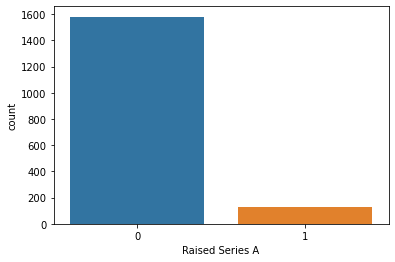

In [117]:
#data visualization for y_train
import seaborn as sns
sns.countplot(data = y_test , x = y_test)

In [118]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier())

params = {
        'xgbclassifier__min_child_weight': [1, 5, 10],
        'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
        'xgbclassifier__subsample': [0.6, 0.8, 1.0],
        'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
        'xgbclassifier__max_depth': [3, 4, 5],
        'xgbclassifier__scale_pos_weight': [10,100,1000,10000,100000],
        "xgbclassifier__reg_alpha": [0, 0.5, 1],
        "xgbclassifier__reg_lambda": [1, 1.5, 2, 3, 4.5],
        "xgbclassifier__n_estimators": [100, 250, 500, 1000]
        }

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=params, 
    n_iter=10, 
    cv=5,  
    verbose=10, 
    return_train_score=True,
    scoring=None,  
    n_jobs=-1
)
pipe = search.fit(X_train, y_train)
predictions = pipe.predict(X_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


In [119]:
print('Best hyperparameters', pipe.best_params_)
print('Cross-validation score', pipe.best_score_)


Best hyperparameters {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10000, 'xgbclassifier__reg_lambda': 4.5, 'xgbclassifier__reg_alpha': 0, 'xgbclassifier__n_estimators': 1000, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__max_depth': 3, 'xgbclassifier__gamma': 1, 'xgbclassifier__colsample_bytree': 0.8}
Cross-validation score 0.8455782591015593


In [120]:
print(classification_report(y_train, predictions))

precision    recall  f1-score   support

           0       1.00      1.00      1.00      6342
           1       0.98      1.00      0.99       477

    accuracy                           1.00      6819
   macro avg       0.99      1.00      0.99      6819
weighted avg       1.00      1.00      1.00      6819



In [121]:
predictions_test = pipe.predict(X_test)
print(classification_report(y_test,predictions_test))

precision    recall  f1-score   support

           0       0.93      0.88      0.91      1580
           1       0.12      0.20      0.15       125

    accuracy                           0.83      1705
   macro avg       0.53      0.54      0.53      1705
weighted avg       0.87      0.83      0.85      1705



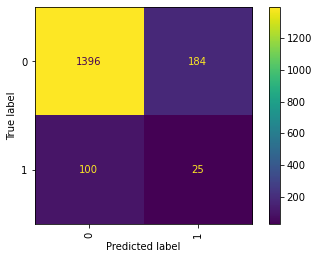

In [122]:
plot_confusion_matrix(pipe, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

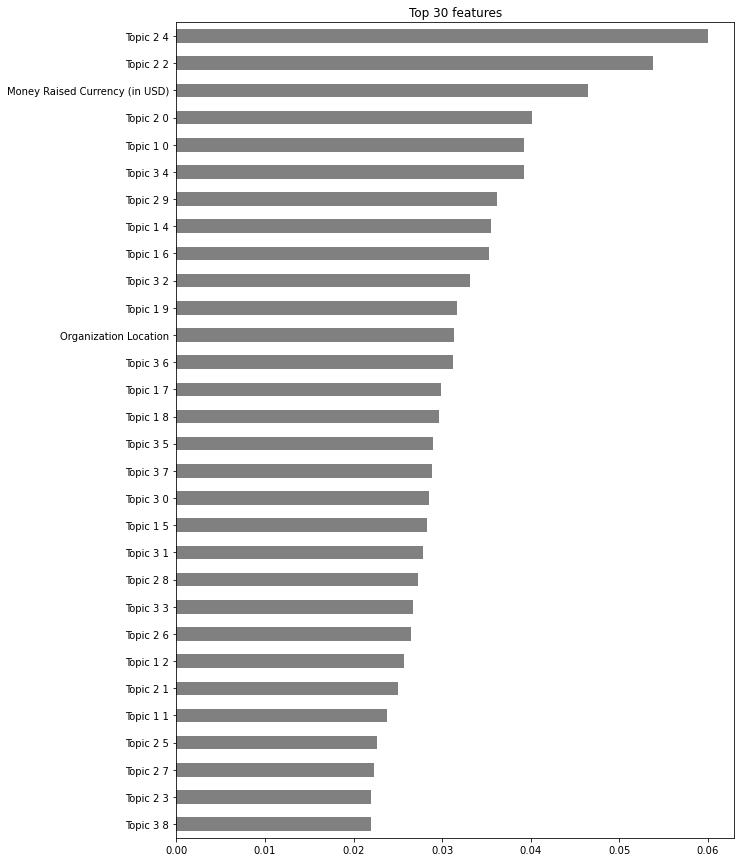

In [123]:
importance = pipe.best_estimator_.named_steps["xgbclassifier"].feature_importances_
features = pd.Series(importance, X_train.columns)
n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
features.sort_values()[-n:].plot.barh(color='grey');

In [196]:
pip install.packages("ldatuning")

/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `/Users/noahpovis/opt/anaconda3/envs/unit2/bin/python -m pip install.packages("ldatuning")'
Note: you may need to restart the kernel to use updated packages.
